In [164]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from pprint import pprint
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

from sklearn.dummy import DummyClassifier
import itertools
import warnings
warnings.simplefilter('ignore')


In [91]:
pd.set_option('display.max_columns', None)
wine= pd.read_csv('clean_wine.csv')

In [92]:
wine.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'type_group'],
      dtype='object')

In [93]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6463 entries, 0 to 6462
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
 13  type_group            6463 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 707.0+ KB


In [94]:
wine['value'] = wine['type'].apply(lambda x: 1 if x == 'white' else 2)

In [95]:
wine['value_type'] = wine['type_group'].apply(lambda x: 1 if x == 'high' else (2 if x=='medium' else 3))

In [96]:
wine.type_group.value_counts()

medium    3894
low       2372
high       197
Name: type_group, dtype: int64

In [97]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_group,value,value_type
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,medium,1,2
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,medium,1,2
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,medium,1,2
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,1,2
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,medium,2,2
6459,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low,2,3
6460,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium,2,2
6461,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low,2,3


In [227]:
X = wine.drop(columns = ['type', 'quality','type_group','value'])
y = wine['value']

[0.08096705 0.14990159 0.03036426 0.07835364 0.12310463 0.05573312
 0.24336819 0.10648016 0.0415787  0.06305399 0.01837359 0.00872109]


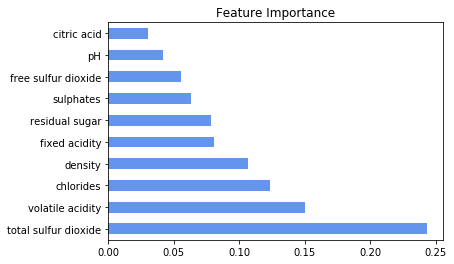

In [228]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
    #plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='cornflowerblue')
plt.title('Feature Importance')
    #plt.savefig('graph9.png',dpi=None,bbox_inches = 'tight')
plt.show()

In [258]:
X = wine.drop(columns = ['type', 'quality','type_group','value','total sulfur dioxide','volatile acidity']).values
y = wine['value'].values
X_r, y_r = SMOTE().fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size=0.2, random_state=42)

In [247]:
print('Training set: ', X_train.shape, y_train.shape)
print('Testing set: ', X_test.shape, y_test.shape)

Training set:  (7792, 10) (7792,)
Testing set:  (1948, 10) (1948,)


In [248]:
dummy_clf = DummyClassifier(strategy= 'most_frequent').fit(X_train,y_train)
dummy_pred = dummy_clf.predict(X_test)
dummy_clf.score(X_train, y_train)

0.5

### Logistic Regression

In [259]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()


Accuracy:  0.9563655030800822


In [273]:
def plot_confusion_matrix(cm, classes,
                            normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=2)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[974   0]
 [974   0]]


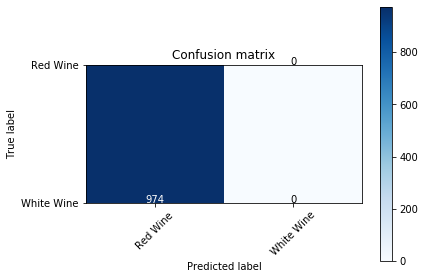

In [269]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [270]:
def datatable(y_test,pred):
    data = { 
        'Micro': [ 
    precision_score(y_test,pred, 
                                               pos_label='positive',
                                               average='micro'),
    recall_score(y_test,pred, 
                                               pos_label='positive',
                                               average='micro'),
    f1_score(y_test,pred, 
                                               pos_label='positive',
                                               average='micro')],

        'Macro': [
            precision_score(y_test,pred, 
                                               pos_label='positive',
                                               average='macro'),
    recall_score(y_test, pred, 
                                               pos_label='positive',
                                               average='macro'),
    f1_score(y_test, pred, 
                                               pos_label='positive',
                                               average='macro')],
        'Weighted':[
       precision_score(y_test,pred, 
                                               pos_label='positive',
                                               average='weighted'),
    recall_score(y_test, pred, 
                                               pos_label='positive',
                                               average='weighted'),
    f1_score(y_test,pred, 
                                               pos_label='positive',
                                               average='weighted')]}

    return pd.DataFrame(data,
                      index=pd.Index(['Precison', 'Recall', 'F1 Score', ], ),
                      columns=pd.Index(['Micro', 'Macro', 'Weighted'],))    

In [271]:
datatable(y_test,y_pred)

,Micro,Macro,Weighted
Precison,0.956366,0.956578,0.956578
Recall,0.956366,0.956366,0.956366
F1 Score,0.956366,0.956360,0.956360


In [272]:
clf = LogisticRegression()
grid_values = {'penalty'
               : ['l1', 'l2'],'C':[100,110,120,140,200,1000,2000],'max_iter':[150,250,350,450],'dual':[True,False]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, verbose=0, cv=10)
grid_clf_acc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 110, 120, 140, 200, 1000, 2000],
                         'dual': [True, False],
                         'max_iter': [150, 250, 350, 450],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [274]:
grid_clf_acc.best_params_


{'C': 200, 'dual': False, 'max_iter': 450, 'penalty': 'l2'}

In [275]:
refclf = LogisticRegression(C=2000,penalty='l2',dual = False, max_iter = 450)
refclf.fit(X_train,y_train)
refpred=refclf.predict(X_test)

In [282]:

cm = confusion_matrix(y_test,refpred)
classes = ['Red Wine', 'White Wine']

Confusion Matrix, without normalization
[[947  27]
 [ 23 951]]


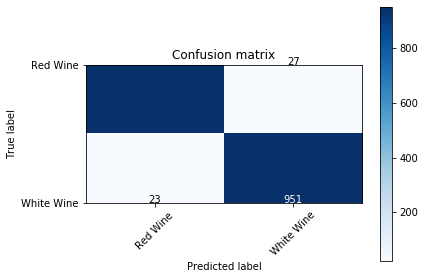

In [283]:

plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [284]:
datatable(y_test,refpred)

,Micro,Macro,Weighted
Precison,0.974333,0.974341,0.974341
Recall,0.974333,0.974333,0.974333
F1 Score,0.974333,0.974333,0.974333


In [285]:
rfc2 = RandomForestClassifier(random_state=42)
rfc2.fit(X_train, y_train)
test_pred = rfc2.predict(X_test)
accuracy_score(y_test, test_pred)

0.9912731006160165

In [287]:
cm = confusion_matrix(y_test,test_pred)
classes = ['Red Wine', 'White Wine']

Confusion Matrix, without normalization
[[969   5]
 [ 12 962]]


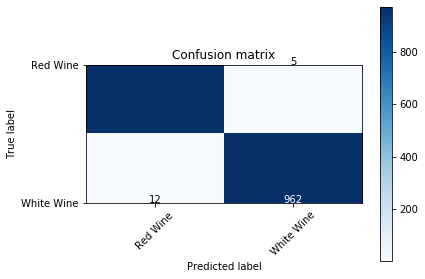

In [288]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [289]:
datatable(y_test,test_pred)


,Micro,Macro,Weighted
Precison,0.991273,0.991298,0.991298
Recall,0.991273,0.991273,0.991273
F1 Score,0.991273,0.991273,0.991273


In [290]:
param_grid = {
    'n_estimators': [50, 100],
    'criterion':['gini', 'entropy'],
    'min_samples_leaf':[2,4],
    'min_samples_split':[3,5],
    'bootstrap': [True, False]
}

In [291]:
gridsearch = GridSearchCV(estimator=rfc2, param_grid=param_grid, cv=5, n_jobs=-1)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [292]:
gridsearch.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [293]:
rfc_ref = RandomForestClassifier(criterion = 'entropy', min_samples_split=5, min_samples_leaf=2,n_estimators=100,
                                bootstrap= False,random_state=42, n_jobs=-1)
rfc_ref.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [294]:
refined_pred = rfc_ref.predict(X_test)


In [295]:
cm = confusion_matrix(y_test,refined_pred)
classes = ['Red Wine', 'White Wine']

In [296]:
datatable(y_test,refined_pred)

,Micro,Macro,Weighted
Precison,0.99076,0.990793,0.990793
Recall,0.99076,0.990760,0.990760
F1 Score,0.99076,0.990760,0.990760
